<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/04_07_solution_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 04_07_solution

Standard imports

In [ ]:
'''
The challenge:
Using bootstrapping on polling data for Mayor Green's grades, estimate the confidence
interval for the fraction of citizens that give her a passing grade: defined as
more than 5.
'''

In [1]:
import math
import io
import os

In [2]:
os.chdir('sample_data')

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [8]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


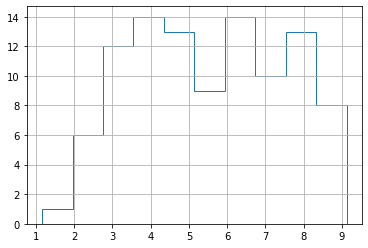

In [9]:
'''
The percentage of citizens who gave the mayor a failing grade is 43%.
'''
pop.grade.hist(histtype='step')

In [10]:
'''
This can be seen by using the function below. 5 is the middle value as the range
of values go between 0 to 10. 
'''
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [11]:
'''
We're going to build a bootstrap distribution by sampling with replacement, and
repeating 1000 times.
'''
bootstrap = pd.DataFrame({'passing': [scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

In [13]:
display(bootstrap.describe())
bootstrap.head()

,passing
count,1000.000000
mean,42.958000
std,4.914712
min,25.000000
25%,39.000000
50%,43.000000
75%,46.000000
max,57.000000


,passing
0,45.0
1,35.0
2,48.0
3,54.0
4,50.0


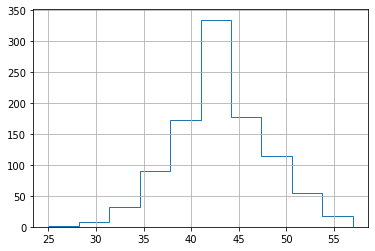

In [14]:
'''
We plotted it to see what it looks like.
'''
bootstrap.passing.hist(histtype='step')

In [15]:
bootstrap.passing.quantile(0.025), bootstrap.passing.quantile(0.975)

(33.0, 53.0)

In [ ]:
'''
The confidence interval of people who believe that the mayor is failing 
(voted a score of 5 or less) is 33% - 52%. Overall, she more than likely has the
overall support of her citizens.
'''